In [ ]:
# K Means Customer segmentation

In [89]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [90]:
## Reading the data 
customers = pd.read_csv('Mall_Customers.csv')
customers_variables = customers.drop(['CustomerID', 'Gender', 'Age'], axis=1)

In [91]:
customers_variables.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [92]:
customers_variables.shape

(200, 2)

In [93]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [94]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [95]:
## Normalise the data if needed

# customers_norm = (customers_variables - customers_variables.min()) / (customers_variables.max() - customers_variables.min())

customers_norm = customers_variables

# print(customers_norm.describe())
# print(customers_norm)

Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (k$)')

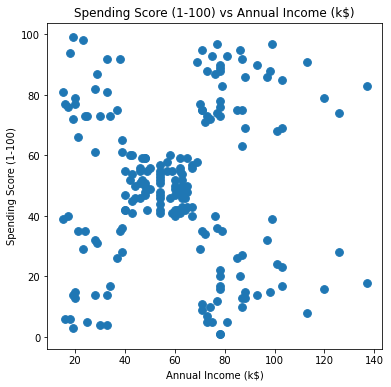

In [96]:
plt.figure(figsize=(6, 6))
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',  data=customers_norm, s=60)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

Text(0, 0.5, 'WCSS')

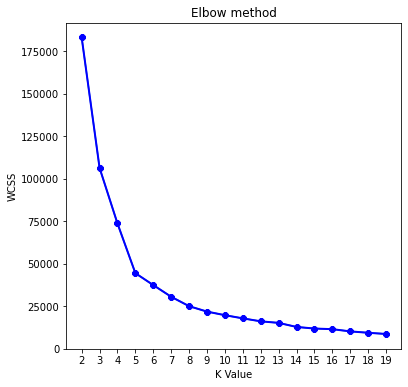

In [97]:
## Selecting ideal value of K using elbow method 

wcss = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(customers_norm)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(range(2, 20), wcss)
plt.title("Elbow method")
plt.plot(range(2,20),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,20,1))
plt.ylabel("WCSS")

In [98]:
clustering = KMeans(n_clusters=5, max_iter=300)
clustering.fit(customers_norm)

KMeans(n_clusters=5)

In [99]:
km1 = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, random_state=None, tol=0.0001, verbose=2)

In [100]:
km1.fit(customers_norm)
y = km1.fit_predict(customers_norm)

Initialization complete
Iteration 0, inertia 65779.0
Iteration 1, inertia 44574.66146443573
Iteration 2, inertia 44448.45544793371
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 67343.0
Iteration 1, inertia 44977.08706747678
Iteration 2, inertia 44470.92816032996
Iteration 3, inertia 44448.45544793371
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 59263.0
Iteration 1, inertia 44652.466912018725
Iteration 2, inertia 44507.109592318775
Iteration 3, inertia 44454.47647967974
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 90419.0
Iteration 1, inertia 68033.31012287491
Iteration 2, inertia 67553.82928716636
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 91505.0
Iteration 1, inertia 54199.90079568711
Iteration 2, inertia 44666.81352946929
Iteration 3, inertia 44539.959977970524
Iteration 4, inertia 44454.47647967974
Co

In [101]:
customers_norm["label"] = y
customers["label"] = y

In [102]:
y

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [104]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (k$)')

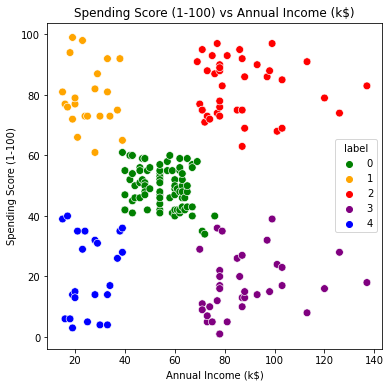

In [103]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="label",
                palette=['green', 'orange', 'red', 'purple', 'blue'], legend='full',
                data=customers_norm, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

In [105]:
km1.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [ ]:
#customers.to_csv('customer_segmentation.csv')